In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def gaussian_kernel(x, y, s=1.0):
    distances = np.sum((x - y)**2, axis=2)
    return np.exp(-distances ** 2 / (2 * s**2))

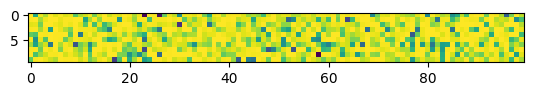

In [71]:
x_values = np.random.random((10, 100, 2))
y_values = np.random.random((10, 100, 2))

similarity_grid = gaussian_kernel(x_values, y_values, 1)

# plt.imshow(np.hstack([x_grid, y_grid]))
plt.imshow(similarity_grid)

## Kernel Density Estimation
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

In [ ]:
from scipy import stats


def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

X, Y = np.mgrid[xmin:xmax:50j, ymin:ymax:50j]

print(X.shape, Y.shape)

positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

[0 1 2 3 6 9]
[4 5]
[ 1  1  1  1  2  2  1 -1 -1  1]
[[0.5488135039273248, 0.7151893663724195], [0.6027633760716439, 0.5448831829968969], [0.4236547993389047, 0.6458941130666561], [0.4375872112626925, 0.8917730007820798], [0.9636627605010293, 0.3834415188257777], [0.7917250380826646, 0.5288949197529045], [0.5680445610939323, 0.925596638292661], [0.07103605819788694, 0.08712929970154071], [0.02021839744032572, 0.832619845547938], [0.7781567509498505, 0.8700121482468192]]


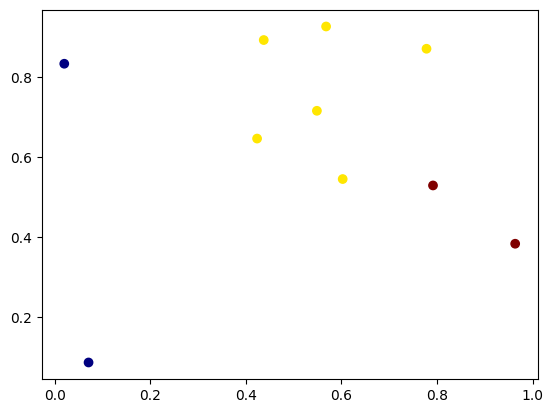

In [158]:
def dbscan(X, epsilon, min_pts):
    """
    Perform DBSCAN clustering on the given dataset.

    Args:
        X (numpy.ndarray): Input data points, shape (n_samples, n_features).
        epsilon (float): The radius of the neighborhood.
        min_pts (int): The minimum number of points in a neighborhood to form a core point.

    Returns:
        labels (numpy.ndarray): Cluster labels assigned to each data point. Noise points are labeled as -1.
    """

    n_samples = X.shape[0]
    visited = np.zeros(n_samples, dtype=bool)  # Track visited points
    labels = np.zeros(n_samples, dtype=int)    # Cluster labels (-1 for noise points)
    cluster_id = 0                             # Current cluster ID

    for i in range(n_samples):
        if visited[i]:
            continue

        visited[i] = True
        neighbors = get_neighbors(X, i, epsilon)  # Find neighbors within epsilon radius

        if len(neighbors) < min_pts:
            labels[i] = -1  # Assign noise label
        else:
            cluster_id += 1
            labels[i] = cluster_id
            expand_cluster(X, i, neighbors, cluster_id, epsilon, min_pts, visited, labels)

    return labels


def get_neighbors(X, idx, epsilon):
    """
    Find the indices of all points within epsilon distance of the given point.

    Args:
        X (numpy.ndarray): Input data points, shape (n_samples, n_features).
        idx (int): Index of the current point.
        epsilon (float): The radius of the neighborhood.

    Returns:
        neighbors (numpy.ndarray): Indices of points within epsilon distance of the current point.
    """

    dists = np.linalg.norm(X - X[idx], axis=1)  # Euclidean distance to all other points
    neighbors = np.where(dists <= epsilon)[0]
    return neighbors


def expand_cluster(X, idx, neighbors, cluster_id, epsilon, min_pts, visited, labels):
    """
    Expand the cluster by recursively adding density-reachable points.

    Args:
        X (numpy.ndarray): Input data points, shape (n_samples, n_features).
        idx (int): Index of the current point.
        neighbors (numpy.ndarray): Indices of neighboring points.
        cluster_id (int): Current cluster ID.
        epsilon (float): The radius of the neighborhood.
        min_pts (int): The minimum number of points in a neighborhood to form a core point.
        visited (numpy.ndarray): Array to track visited points.
        labels (numpy.ndarray): Cluster labels assigned to each data point.
    """

    print(neighbors)
    for neighbor in neighbors:
       
        if not visited[neighbor]:
            visited[neighbor] = True
            new_neighbors = get_neighbors(X, neighbor, epsilon)  # Find neighbors of the current neighbor

            if len(new_neighbors) >= min_pts:
                neighbors = np.concatenate((neighbors, new_neighbors))

        if labels[neighbor] == 0:
            labels[neighbor] = cluster_id


# Example usage
# X = np.array([[1, 2], [1, 3], [2, 2], [8, 7], [8, 8], [25, 80], [0, 0], [9, 10]])
np.random.seed(0)
points = np.random.random((10, 2))
epsilon = 0.3
min_pts = 2

cluster_labels = dbscan(points, epsilon, min_pts)
print(cluster_labels)

plt.scatter(points[:, 0], points[:, 1], c=cluster_labels, cmap='jet')

print(points.tolist())